In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import dataset from data.csv file
dataset = pd.read_csv('training.csv',sep='\t')
dataset = dataset.dropna(subset=["Temperature"])
dataset=dataset.reset_index(drop=True)
training_set = dataset.iloc[:,1:2].values

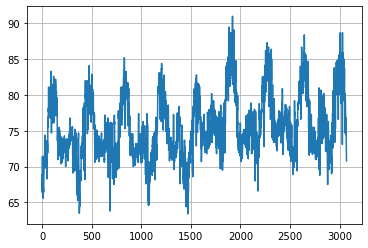

In [2]:
fig,ax=plt.subplots(1,1)
#ax.plot(np.arange(0,len(x_train[0])),x_train[0],c='b',marker='o',ms=10)
ax.plot(training_set)

ax.grid(True)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


In [4]:
training_set.shape

(3071, 1)

In [5]:
training_set

array([[68.9],
       [66.4],
       [68.7],
       ...,
       [72.7],
       [71. ],
       [70.8]])

In [6]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
x_train = []
y_train = []
n_future = 4 # next 4 days temperature forecast
n_past = 30 # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [8]:
x_train.shape

(3038, 30, 1)

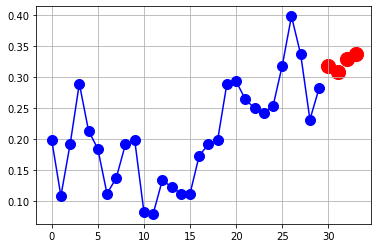

In [9]:
fig,ax=plt.subplots(1,1)
ax.plot(np.arange(0,len(x_train[0])),x_train[0],c='b',marker='o',ms=10)
ax.scatter([30,31,32,33],y_train[0],c='r',s=200)

ax.grid(True)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional

In [18]:
model = keras.Sequential([ Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) )) ,
                          Dropout(0.2),
                          LSTM(units= 30 , return_sequences=True),
                          Dropout(0.2),
                          LSTM(units= 30 , return_sequences=True),
                          Dropout(0.2),
                          LSTM(units= 30),
                          Dropout(0.2),
                          Dense(units = n_future,activation='linear')])

In [19]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.1),metrics=['acc'])

In [ ]:
history=model.fit(x_train, y_train, epochs=500,batch_size=64 )

Epoch 1/500
48/48 [==============================] - 9s 41ms/step - loss: 0.1097 - acc: 0.2386
Epoch 2/500
48/48 [==============================] - 2s 40ms/step - loss: 0.0269 - acc: 0.2521
Epoch 3/500
48/48 [==============================] - 2s 41ms/step - loss: 0.0257 - acc: 0.2396
Epoch 4/500
48/48 [==============================] - 2s 41ms/step - loss: 0.0256 - acc: 0.2551
Epoch 5/500
48/48 [==============================] - 2s 41ms/step - loss: 0.0255 - acc: 0.2492
Epoch 6/500
48/48 [==============================] - 2s 48ms/step - loss: 0.0255 - acc: 0.2604
Epoch 7/500
48/48 [==============================] - 2s 45ms/step - loss: 0.0256 - acc: 0.2617
Epoch 8/500
15/48 [========>.....................] - ETA: 1s - loss: 0.0265 - acc: 0.2406

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(history.history['acc'])
#ax.plot(history.history['val_loss'])
ax.grid(True)